# Draw Focus for paper


- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNRS

- creation date : May 18th 2020

In [123]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib as mpl
import pandas as pd
import itertools
import matplotlib.gridspec as gridspec

In [124]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (13, 13),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'font.size': 14}
plt.rcParams.update(params)

## Constants for conversions

In [125]:
m_to_mm=1000.
mm_to_m=1e-3
inch_to_mm=25.4
mm_to_inch=1./inch_to_mm
micr_to_m=1e-6
micr_to_mm=1e-3
m_to_micr=1./micr_to_m
m_to_cm=100.
m_to_nm=1e9
nm_to_m=1./m_to_nm

In [126]:
arcdeg_to_arcmin=60.
arcmin_to_arcdeg=1./arcdeg_to_arcmin
arcmin_to_arcsec=60.
arcdeg_to_arcsec=arcdeg_to_arcmin*arcmin_to_arcsec
arcsec_to_arcdeg=1./arcdeg_to_arcsec

In [127]:
deg_to_rad=np.pi/180.

In [128]:
rad_to_deg=1./deg_to_rad
rad_to_arcsec=rad_to_deg*arcdeg_to_arcsec
rad_to_arcmin=rad_to_deg*arcdeg_to_arcmin
arcmin_to_rad=1./rad_to_arcmin

## Configuration parameters at the telescope

#### telescope

In [129]:
Tel_Focal_Length=21.6 # m : Focal length of the telescope
Tel_Diameter=1.2 # m : Diameter of the telescope    
Tel_Fnum=Tel_Focal_Length/Tel_Diameter

#### filter

In [130]:
Filt_D=0.265 # m distance of the filter position wrt CCD plane
Filt_size=3*inch_to_mm

#### CCD detector

In [131]:
Det_xpic=10.0 # microns per pixel
Det_NbPix=4096 # number of pixels per CCD side 
Det_size=Det_xpic*Det_NbPix*micr_to_mm # CCD size in mm, 5 cm or 2 inch

## Input file

In [132]:
# number of rays
NBEAM_X=11
NBEAM_Y=11
NBEAM=NBEAM_X*NBEAM_Y
NWL=4
NBTOT=NBEAM*NWL

In [133]:
theta_x=0.  # angle in arcmin
theta_y=0.  # angle in arcmin 

In [134]:
theta_x_num=int(theta_x*10)
theta_y_num=int(theta_y*10)

In [135]:
if theta_x_num>0:
    theta_nstr='{:0>2}'.format(theta_x_num)
    theta_x_str="p"+theta_nstr
else:
    theta_nstr='{:0>2}'.format(-theta_x_num)
    theta_x_str="m"+theta_nstr

In [136]:
if theta_y_num>0:
    theta_nstr='{:0>2}'.format(theta_y_num)
    theta_y_str="p"+theta_nstr
else:
    theta_nstr='{:0>2}'.format(-theta_y_num)
    theta_y_str="m"+theta_nstr

In [137]:
Beam4_Rayfile="Beam4_Rayfile_{:d}_allwl_{}_{}".format(NBTOT,theta_x_str,theta_y_str)

In [138]:
Beam4_Rayfile

'Beam4_Rayfile_484_allwl_m00_m00'

## Wavelength

In [139]:
ColorDict = {0.0004:"b",0.0006:"g",0.0008:"r",0.001:"k"}

# Read input files

In [140]:
rayfile_hoe="HOE_"+Beam4_Rayfile+"_RAY_OUT.xlsx"
rayfile_R150="R150_"+Beam4_Rayfile+"_RAY_OUT.xlsx"

## Hologram

In [141]:
input_hoe = pd.ExcelFile(rayfile_hoe)
df_hoe = input_hoe.parse(index_row=0,header=1)
#df_hoe=df_hoe.iloc[0:NBTOT]
df_hoe=df_hoe.drop(0)

In [142]:
df_hoe

,X0,Y0,Z0,U0,V0,W0,wave,col,X1,Y1,...,X3,Y3,Z3,Xgoal,Ygoal,Xfinal,Yfinal,Zfinal,Notes,Unnamed: 23
1,-7.36016,-7.36016,0,0.0277528,0.0277528,0.999229,0.0004,b,-5.55484,-5.55484,...,12.4006,-0.00625,265,0,0,12.4006,-0.00625,265,OK,3.0
2,-5.88813,-7.36016,0,0.0222053,0.0277567,0.999368,0.0004,b,-4.44387,-5.55484,...,12.4043,-0.00626,265,0,0,12.4043,-0.00626,265,OK,3.0
3,-4.4161,-7.36016,0,0.0166558,0.0277596,0.999476,0.0004,b,-3.3329,-5.55484,...,12.408,-0.00631,265,0,0,12.408,-0.00631,265,OK,3.0
4,-2.94407,-7.36016,0,0.0111047,0.0277618,0.999553,0.0004,b,-2.22194,-5.55484,...,12.4118,-0.00632,265,0,0,12.4118,-0.00632,265,OK,3.0
5,-1.47203,-7.36016,0,0.0055526,0.0277631,0.999599,0.0004,b,-1.11097,-5.55484,...,12.4155,-0.00634,265,0,0,12.4155,-0.00634,265,OK,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,1.47203,7.36016,0,-0.0055526,-0.0277631,0.999599,0.001,k,1.11097,5.55484,...,31.3556,-0.02496,265,0,0,31.3556,-0.02496,265,OK,3.0
481,2.94407,7.36016,0,-0.0111047,-0.0277618,0.999553,0.001,k,2.22194,5.55484,...,31.3406,-0.02489,265,0,0,31.3406,-0.02489,265,OK,3.0
482,4.4161,7.36016,0,-0.0166558,-0.0277596,0.999476,0.001,k,3.3329,5.55484,...,31.3257,-0.0248,265,0,0,31.3257,-0.0248,265,OK,3.0
483,5.88813,7.36016,0,-0.0222053,-0.0277567,0.999368,0.001,k,4.44387,5.55484,...,31.3108,-0.02476,265,0,0,31.3108,-0.02476,265,OK,3.0


In [143]:
df_hoe.columns

Index([' X0', 'Y0', 'Z0', 'U0', 'V0', 'W0', 'wave', 'col', 'X1', 'Y1', 'Z1',
       'X2', 'Y2', 'Z2', 'X3', 'Y3', 'Z3', 'Xgoal', 'Ygoal', 'Xfinal',
       'Yfinal', 'Zfinal', 'Notes', 'Unnamed: 23'],
      dtype='object')

In [144]:
# rename columns otherwise they are not recognize and swap X,Y
df_hoe.columns = ["X0","Y0","Z0","U0","V0","W0","wave","col","X1","Y1","Z1","X2","Y2","Z2","X3","Y3","Z3","Xgoal","Ygoal","Xfinal","Yfinal","Zfinal","Notes","Unnamed"]

In [145]:
df_hoe

,X0,Y0,Z0,U0,V0,W0,wave,col,X1,Y1,...,X3,Y3,Z3,Xgoal,Ygoal,Xfinal,Yfinal,Zfinal,Notes,Unnamed
1,-7.36016,-7.36016,0,0.0277528,0.0277528,0.999229,0.0004,b,-5.55484,-5.55484,...,12.4006,-0.00625,265,0,0,12.4006,-0.00625,265,OK,3.0
2,-5.88813,-7.36016,0,0.0222053,0.0277567,0.999368,0.0004,b,-4.44387,-5.55484,...,12.4043,-0.00626,265,0,0,12.4043,-0.00626,265,OK,3.0
3,-4.4161,-7.36016,0,0.0166558,0.0277596,0.999476,0.0004,b,-3.3329,-5.55484,...,12.408,-0.00631,265,0,0,12.408,-0.00631,265,OK,3.0
4,-2.94407,-7.36016,0,0.0111047,0.0277618,0.999553,0.0004,b,-2.22194,-5.55484,...,12.4118,-0.00632,265,0,0,12.4118,-0.00632,265,OK,3.0
5,-1.47203,-7.36016,0,0.0055526,0.0277631,0.999599,0.0004,b,-1.11097,-5.55484,...,12.4155,-0.00634,265,0,0,12.4155,-0.00634,265,OK,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,1.47203,7.36016,0,-0.0055526,-0.0277631,0.999599,0.001,k,1.11097,5.55484,...,31.3556,-0.02496,265,0,0,31.3556,-0.02496,265,OK,3.0
481,2.94407,7.36016,0,-0.0111047,-0.0277618,0.999553,0.001,k,2.22194,5.55484,...,31.3406,-0.02489,265,0,0,31.3406,-0.02489,265,OK,3.0
482,4.4161,7.36016,0,-0.0166558,-0.0277596,0.999476,0.001,k,3.3329,5.55484,...,31.3257,-0.0248,265,0,0,31.3257,-0.0248,265,OK,3.0
483,5.88813,7.36016,0,-0.0222053,-0.0277567,0.999368,0.001,k,4.44387,5.55484,...,31.3108,-0.02476,265,0,0,31.3108,-0.02476,265,OK,3.0


## Ronchi 150

In [146]:
input_R150 = pd.ExcelFile(rayfile_R150)
df_R150 = input_R150.parse(index_row=0,header=1)
#df_R150=df_R150.iloc[0:NBTOT]

In [147]:
df_R150=df_R150.drop(0)
df_R150 = df_R150.reset_index()

In [148]:
df_R150

,index,X0,Y0,Z0,U0,V0,W0,wave,col,X1,...,X3,Y3,Z3,Xgoal,Ygoal,Xfinal,Yfinal,Zfinal,Notes,Unnamed: 23
0,1,-7.36016,-7.36016,0,0.0277528,0.0277528,0.999229,0.0004,b,-5.55484,...,12.0102,0.01928,265,0,0,12.0102,0.01928,265,OK,3.0
1,2,-5.88813,-7.36016,0,0.0222053,0.0277567,0.999368,0.0004,b,-4.44387,...,11.9991,0.01743,265,0,0,11.9991,0.01743,265,OK,3.0
2,3,-4.4161,-7.36016,0,0.0166558,0.0277596,0.999476,0.0004,b,-3.3329,...,11.9892,0.01554,265,0,0,11.9892,0.01554,265,OK,3.0
3,4,-2.94407,-7.36016,0,0.0111047,0.0277618,0.999553,0.0004,b,-2.22194,...,11.9804,0.0137,265,0,0,11.9804,0.0137,265,OK,3.0
4,5,-1.47203,-7.36016,0,0.0055526,0.0277631,0.999599,0.0004,b,-1.11097,...,11.9727,0.01185,265,0,0,11.9727,0.01185,265,OK,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,480,1.47203,7.36016,0,-0.0055526,-0.0277631,0.999599,0.001,k,1.11097,...,30.1666,-0.05855,265,0,0,30.1666,-0.05855,265,OK,3.0
480,481,2.94407,7.36016,0,-0.0111047,-0.0277618,0.999553,0.001,k,2.22194,...,30.1325,-0.0538,265,0,0,30.1325,-0.0538,265,OK,3.0
481,482,4.4161,7.36016,0,-0.0166558,-0.0277596,0.999476,0.001,k,3.3329,...,30.1014,-0.04905,265,0,0,30.1014,-0.04905,265,OK,3.0
482,483,5.88813,7.36016,0,-0.0222053,-0.0277567,0.999368,0.001,k,4.44387,...,30.0731,-0.04437,265,0,0,30.0731,-0.04437,265,OK,3.0


# Compute straight line parameters for each ray

In [149]:
def norm(x,y,z):
    return np.sqrt(x**2+y**2+z**2)

In [150]:
def norm_row(row):
    DX=row["X3"]-row["X2"]
    DY=row["Y3"]-row["Y2"]
    DZ=row["Z3"]-row["Z2"]
    return norm(DX,DY,DZ)

In [151]:
def u_row(row):
    norm=norm_row(row)
    DX=row["X3"]-row["X2"]
    return DX/norm

In [152]:
def v_row(row):
    norm=norm_row(row)
    DY=row["Y3"]-row["Y2"]
    return DY/norm

In [153]:
def w_row(row):
    norm=norm_row(row)
    DZ=row["Z3"]-row["Z2"]
    return DZ/norm

In [154]:
def norm_check(row):
    return norm(row["Uf"],row["Vf"],row["Wf"])

In [155]:
df_hoe["Uf"]=df_hoe.apply(u_row,axis=1)
df_hoe["Vf"]=df_hoe.apply(v_row,axis=1)
df_hoe["Wf"]=df_hoe.apply(w_row,axis=1)

In [156]:
#df_hoe.apply(norm_check,axis=1)

In [157]:
df_R150["Uf"]=df_R150.apply(u_row,axis=1)
df_R150["Vf"]=df_R150.apply(v_row,axis=1)
df_R150["Wf"]=df_R150.apply(w_row,axis=1)

In [158]:
#df_R400.apply(norm_check,axis=1)

# Compute the intersection points (Xi,Yi) with the plane Z=Zi

In [159]:
def xi_row(row):
    k=(row["Zi"]-row["Z3"])/row["Wf"]
    xi=row["X3"]+ k*row["Uf"]
    return xi

In [160]:
def yi_row(row):
    k=(row["Zi"]-row["Z3"])/row["Wf"]
    yi=row["Y3"]+ k*row["Vf"]
    return yi

In [161]:
df_hoe["Zi"]=df_hoe["Z3"]+1 

In [162]:
df_hoe["Xi"]=df_hoe.apply(xi_row,axis=1)
df_hoe["Yi"]=df_hoe.apply(yi_row,axis=1)

In [163]:
df_hoe

,X0,Y0,Z0,U0,V0,W0,wave,col,X1,Y1,...,Yfinal,Zfinal,Notes,Unnamed,Uf,Vf,Wf,Zi,Xi,Yi
1,-7.36016,-7.36016,0,0.0277528,0.0277528,0.999229,0.0004,b,-5.55484,-5.55484,...,-0.00625,265,OK,3.0,0.089691,0.027620,0.995587,266,12.490669,0.021493
2,-5.88813,-7.36016,0,0.0222053,0.0277567,0.999368,0.0004,b,-4.44387,-5.55484,...,-0.00626,265,OK,3.0,0.084220,0.027634,0.996064,266,12.488842,0.021483
3,-4.4161,-7.36016,0,0.0166558,0.0277596,0.999476,0.0004,b,-3.3329,-5.55484,...,-0.00631,265,OK,3.0,0.078741,0.027646,0.996512,266,12.487046,0.021433
4,-2.94407,-7.36016,0,0.0111047,0.0277618,0.999553,0.0004,b,-2.22194,-5.55484,...,-0.00632,265,OK,3.0,0.073255,0.027657,0.996930,266,12.485250,0.021422
5,-1.47203,-7.36016,0,0.0055526,0.0277631,0.999599,0.0004,b,-1.11097,-5.55484,...,-0.00634,265,OK,3.0,0.067762,0.027668,0.997318,266,12.483474,0.021402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,1.47203,7.36016,0,-0.0055526,-0.0277631,0.999599,0.001,k,1.11097,5.55484,...,-0.02496,265,OK,3.0,0.150227,-0.027572,0.988267,266,31.507611,-0.052860
481,2.94407,7.36016,0,-0.0111047,-0.0277618,0.999553,0.001,k,2.22194,5.55484,...,-0.02489,265,OK,3.0,0.144782,-0.027595,0.989079,266,31.487021,-0.052789
482,4.4161,7.36016,0,-0.0166558,-0.0277596,0.999476,0.001,k,3.3329,5.55484,...,-0.0248,265,OK,3.0,0.139324,-0.027616,0.989862,266,31.466451,-0.052699
483,5.88813,7.36016,0,-0.0222053,-0.0277567,0.999368,0.001,k,4.44387,5.55484,...,-0.02476,265,OK,3.0,0.133853,-0.027637,0.990616,266,31.445931,-0.052659


In [164]:
df_hoe.groupby(["wave"]).mean()

,Unnamed,Uf,Vf,Wf,Xi,Yi
wave,,,,,,
0.0004,3.0,0.062250,1.548348e-18,0.997755,12.481779,-7.455010e-19
0.0006,3.0,0.093375,6.881548e-19,0.995326,18.768363,-1.175598e-18
0.0008,3.0,0.124500,-1.146925e-19,0.991914,25.110587,-2.293849e-19
0.0010,3.0,0.155624,-1.634368e-18,0.987510,31.528303,-5.734623e-20


In [165]:
df_hoe.groupby(["wave"]).std()

,Unnamed,Uf,Vf,Wf,Xi,Yi
wave,,,,,,
0.0004,0.0,0.017469,0.017577,0.001106,0.005537,0.013578
0.0006,0.0,0.017388,0.017550,0.001641,0.014870,0.016710
0.0008,0.0,0.017307,0.017523,0.002179,0.034722,0.023354
0.0010,0.0,0.017225,0.017495,0.002719,0.065488,0.033602


In [166]:
df_hoe.groupby(["wave"]).std()["Xi"]

wave
0.0004    0.005537
0.0006    0.014870
0.0008    0.034722
0.0010    0.065488
Name: Xi, dtype: float64

In [167]:
df_hoe.groupby(["wave"]).std().iloc[0]

Unnamed    0.000000
Uf         0.017469
Vf         0.017577
Wf         0.001106
Xi         0.005537
Yi         0.013578
Name: 0.0004, dtype: float64

# Loop on focal plane focus shift

- blue line : 400 nm
- green line : 600 nm
- red line : 800 nm
- black line : 1000 nm

In [168]:
all_Zfocus=np.arange(-10,2.5,0.1)  # from -10 mm to 5 mm step 200 microns, thus 75 points

In [169]:
Nfocus=len(all_Zfocus)

In [170]:
Nfocus

125

## loop on defocus for HOE

In [171]:
all_Xi_av_hoe=np.zeros((Nfocus,NWL))
all_Xi_std_hoe=np.zeros((Nfocus,NWL))
all_Yi_av_hoe=np.zeros((Nfocus,NWL))
all_Yi_std_hoe=np.zeros((Nfocus,NWL))

In [172]:
# loop on defocus
for ifocus,defocus in np.ndenumerate(all_Zfocus):
    idx=ifocus[0]
    df_hoe["Zi"]=df_hoe["Z3"]+defocus 
    # compute intersection points with the new detection plane
    df_hoe["Xi"]=df_hoe.apply(xi_row,axis=1)
    df_hoe["Yi"]=df_hoe.apply(yi_row,axis=1)
    
    # group by wavelength
    df_av=df_hoe.groupby(["wave"]).mean()
    df_std=df_hoe.groupby(["wave"]).std()
    
    # loop on wavelength
    for iwl in np.arange(NWL):
        all_Xi_av_hoe[idx,iwl]=df_av.iloc[iwl]["Xi"]
        all_Yi_av_hoe[idx,iwl]=df_av.iloc[iwl]["Yi"]
        all_Xi_std_hoe[idx,iwl]=df_std.iloc[iwl]["Xi"]
        all_Yi_std_hoe[idx,iwl]=df_std.iloc[iwl]["Yi"]

Text(0.5, 1.0, 'spot size versus defocus for HOE')

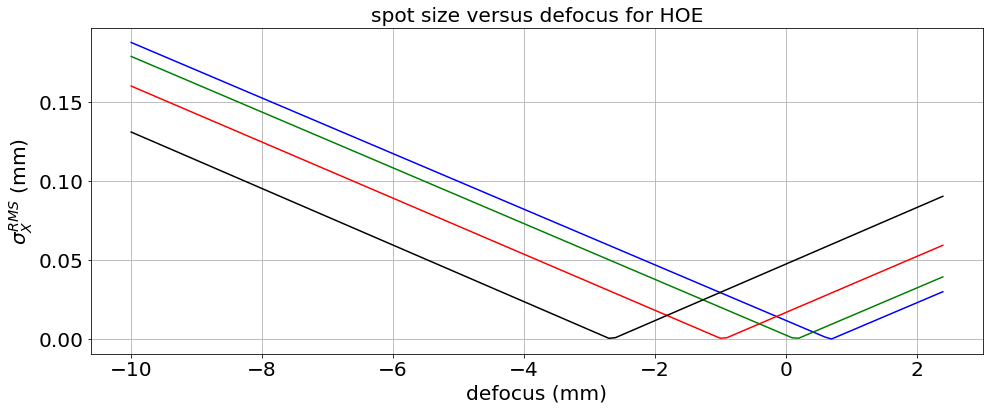

In [173]:
plt.figure(figsize=(16,6))
plt.plot(all_Zfocus,all_Xi_std_hoe[:,0],"b-")
plt.plot(all_Zfocus,all_Xi_std_hoe[:,1],"g-")
plt.plot(all_Zfocus,all_Xi_std_hoe[:,2],"r-")
plt.plot(all_Zfocus,all_Xi_std_hoe[:,3],"k-")
plt.grid()
plt.xlabel("defocus (mm)")
plt.ylabel("$\sigma_{X}^{RMS}$ (mm)")
plt.title("spot size versus defocus for HOE")

In [174]:
idx=np.where(all_Xi_std_hoe[:,3]==all_Xi_std_hoe[:,3].min())[0][0]

In [175]:
all_Zfocus[idx]

-2.700000000000026

In [176]:
for iwl in np.arange(0,4):
    idx=np.where(all_Xi_std_hoe[:,iwl]==all_Xi_std_hoe[:,iwl].min())[0][0]
    shift=all_Zfocus[idx]
    print("HOE : iwl={}, defocus={:3.3f} mm ".format(iwl,shift))

HOE : iwl=0, defocus=0.700 mm 
HOE : iwl=1, defocus=0.200 mm 
HOE : iwl=2, defocus=-1.000 mm 
HOE : iwl=3, defocus=-2.700 mm 


Text(0.5, 1.0, 'spot size versus defocus for HOE')

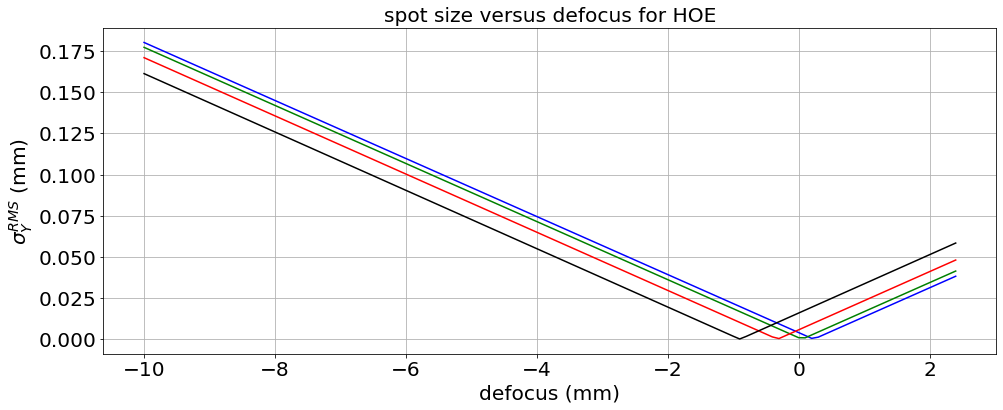

In [177]:
plt.figure(figsize=(16,6))
plt.plot(all_Zfocus,all_Yi_std_hoe[:,0],"b-")
plt.plot(all_Zfocus,all_Yi_std_hoe[:,1],"g-")
plt.plot(all_Zfocus,all_Yi_std_hoe[:,2],"r-")
plt.plot(all_Zfocus,all_Yi_std_hoe[:,3],"k-")
plt.grid()
plt.xlabel("defocus (mm)")
plt.ylabel("$\sigma_{Y}^{RMS}$ (mm)")
plt.title("spot size versus defocus for HOE")

In [178]:
all_XiYi_std_hoe=np.sqrt(all_Xi_std_hoe**2+all_Yi_std_hoe**2)

Text(0.5, 1.0, 'spot size versus defocus for HOE')

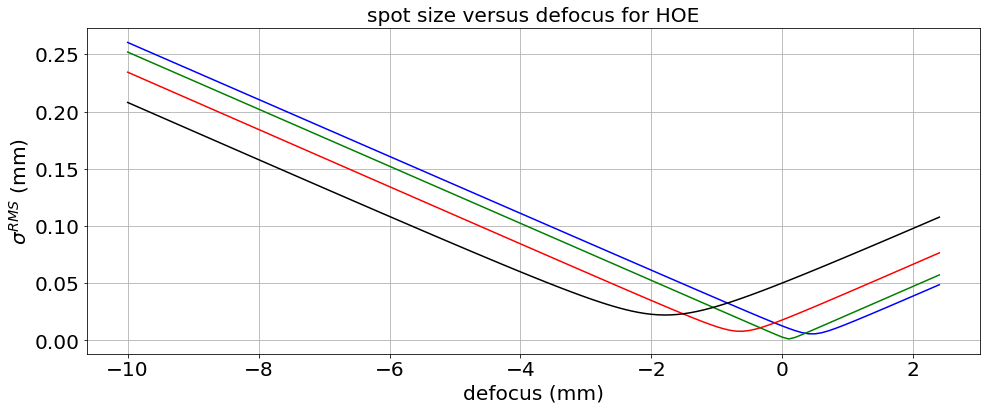

In [179]:
plt.figure(figsize=(16,6))
plt.plot(all_Zfocus,all_XiYi_std_hoe[:,0],"b-")
plt.plot(all_Zfocus,all_XiYi_std_hoe[:,1],"g-")
plt.plot(all_Zfocus,all_XiYi_std_hoe[:,2],"r-")
plt.plot(all_Zfocus,all_XiYi_std_hoe[:,3],"k-")
plt.grid()
plt.xlabel("defocus (mm)")
plt.ylabel("$\sigma^{RMS}$ (mm)")
plt.title("spot size versus defocus for HOE")

## loop on defocus for Ron 150

In [180]:
df_R150

,index,X0,Y0,Z0,U0,V0,W0,wave,col,X1,...,Xgoal,Ygoal,Xfinal,Yfinal,Zfinal,Notes,Unnamed: 23,Uf,Vf,Wf
0,1,-7.36016,-7.36016,0,0.0277528,0.0277528,0.999229,0.0004,b,-5.55484,...,0,0,12.0102,0.01928,265,OK,3.0,0.087753,0.027753,0.995756
1,2,-5.88813,-7.36016,0,0.0222053,0.0277567,0.999368,0.0004,b,-4.44387,...,0,0,11.9991,0.01743,265,OK,3.0,0.082205,0.027757,0.996229
2,3,-4.4161,-7.36016,0,0.0166558,0.0277596,0.999476,0.0004,b,-3.3329,...,0,0,11.9892,0.01554,265,OK,3.0,0.076656,0.027760,0.996671
3,4,-2.94407,-7.36016,0,0.0111047,0.0277618,0.999553,0.0004,b,-2.22194,...,0,0,11.9804,0.0137,265,OK,3.0,0.071105,0.027762,0.997082
4,5,-1.47203,-7.36016,0,0.0055526,0.0277631,0.999599,0.0004,b,-1.11097,...,0,0,11.9727,0.01185,265,OK,3.0,0.065553,0.027763,0.997463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,480,1.47203,7.36016,0,-0.0055526,-0.0277631,0.999599,0.001,k,1.11097,...,0,0,30.1666,-0.05855,265,OK,3.0,0.144447,-0.027763,0.989123
480,481,2.94407,7.36016,0,-0.0111047,-0.0277618,0.999553,0.001,k,2.22194,...,0,0,30.1325,-0.0538,265,OK,3.0,0.138895,-0.027762,0.989918
481,482,4.4161,7.36016,0,-0.0166558,-0.0277596,0.999476,0.001,k,3.3329,...,0,0,30.1014,-0.04905,265,OK,3.0,0.133344,-0.027760,0.990681
482,483,5.88813,7.36016,0,-0.0222053,-0.0277567,0.999368,0.001,k,4.44387,...,0,0,30.0731,-0.04437,265,OK,3.0,0.127795,-0.027757,0.991412


In [181]:
all_Xi_av_R150=np.zeros((Nfocus,NWL))
all_Xi_std_R150=np.zeros((Nfocus,NWL))
all_Yi_av_R150=np.zeros((Nfocus,NWL))
all_Yi_std_R150=np.zeros((Nfocus,NWL))

In [182]:
# loop on defocus
for ifocus,defocus in np.ndenumerate(all_Zfocus):
    idx=ifocus[0]
    df_R150["Zi"]=df_R150["Z3"]+defocus 
    # compute intersection points with the new detection plane
    df_R150["Xi"]=df_R150.apply(xi_row,axis=1)
    df_R150["Yi"]=df_R150.apply(yi_row,axis=1)
    
    # group by wavelength
    df_av=df_R150.groupby(["wave"]).mean()
    df_std=df_R150.groupby(["wave"]).std()
    
    # loop on wavelength
    for iwl in np.arange(NWL):
        all_Xi_av_R150[idx,iwl]=df_av.iloc[iwl]["Xi"]
        all_Yi_av_R150[idx,iwl]=df_av.iloc[iwl]["Yi"]
        all_Xi_std_R150[idx,iwl]=df_std.iloc[iwl]["Xi"]
        all_Yi_std_R150[idx,iwl]=df_std.iloc[iwl]["Yi"]

Text(0.5, 1.0, 'spot size versus defocus for R150')

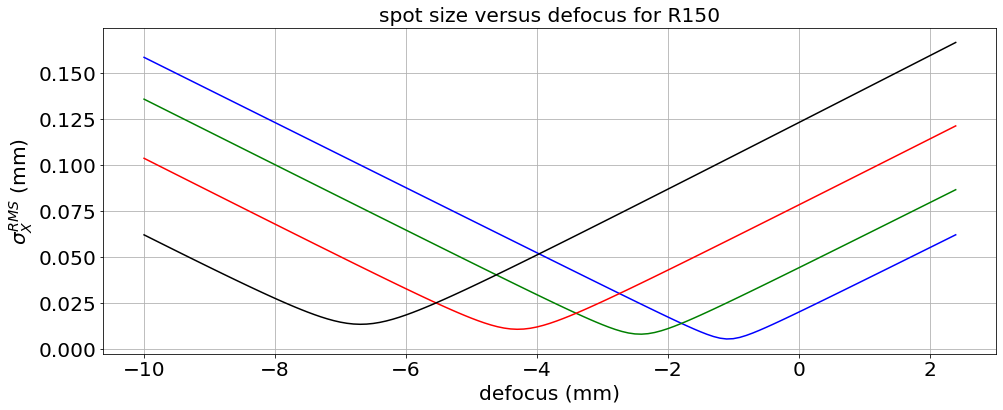

In [183]:
plt.figure(figsize=(16,6))
plt.plot(all_Zfocus,all_Xi_std_R150[:,0],"b-")
plt.plot(all_Zfocus,all_Xi_std_R150[:,1],"g-")
plt.plot(all_Zfocus,all_Xi_std_R150[:,2],"r-")
plt.plot(all_Zfocus,all_Xi_std_R150[:,3],"k-")
plt.grid()
plt.xlabel("defocus (mm)")
plt.ylabel("$\sigma_{X}^{RMS}$ (mm)")
plt.title("spot size versus defocus for R150")

In [184]:
for iwl in np.arange(0,4):
    idx=np.where(all_Xi_std_R150[:,iwl]==all_Xi_std_R150[:,iwl].min())[0][0]
    shift=all_Zfocus[idx]
    print("R150 : iwl={}, defocus={:3.3f} mm ".format(iwl,shift))

R150 : iwl=0, defocus=-1.100 mm 
R150 : iwl=1, defocus=-2.400 mm 
R150 : iwl=2, defocus=-4.300 mm 
R150 : iwl=3, defocus=-6.700 mm 


Text(0.5, 1.0, 'spot size versus defocus for R150')

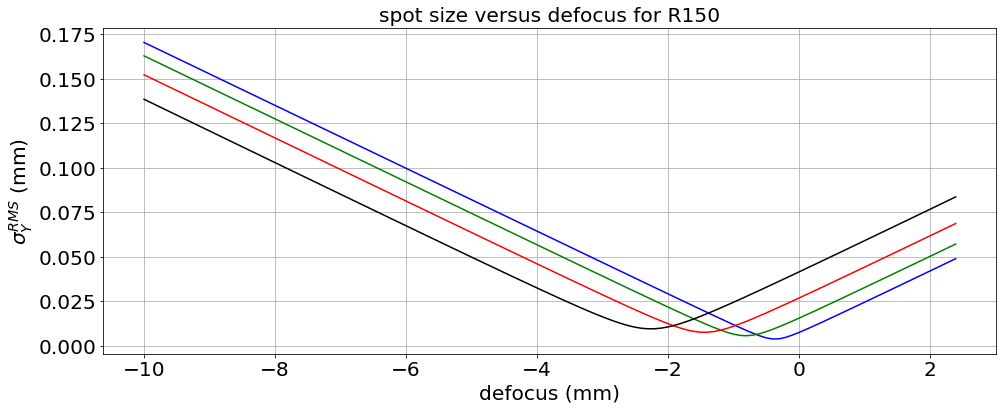

In [185]:
plt.figure(figsize=(16,6))
plt.plot(all_Zfocus,all_Yi_std_R150[:,0],"b-")
plt.plot(all_Zfocus,all_Yi_std_R150[:,1],"g-")
plt.plot(all_Zfocus,all_Yi_std_R150[:,2],"r-")
plt.plot(all_Zfocus,all_Yi_std_R150[:,3],"k-")
plt.grid()
plt.xlabel("defocus (mm)")
plt.ylabel("$\sigma_{Y}^{RMS}$ (mm)")
plt.title("spot size versus defocus for R150")

In [186]:
all_XiYi_std_R150=np.sqrt(all_Xi_std_R150**2+all_Yi_std_R150**2)

Text(0.5, 1.0, 'spot size versus defocus for R150')

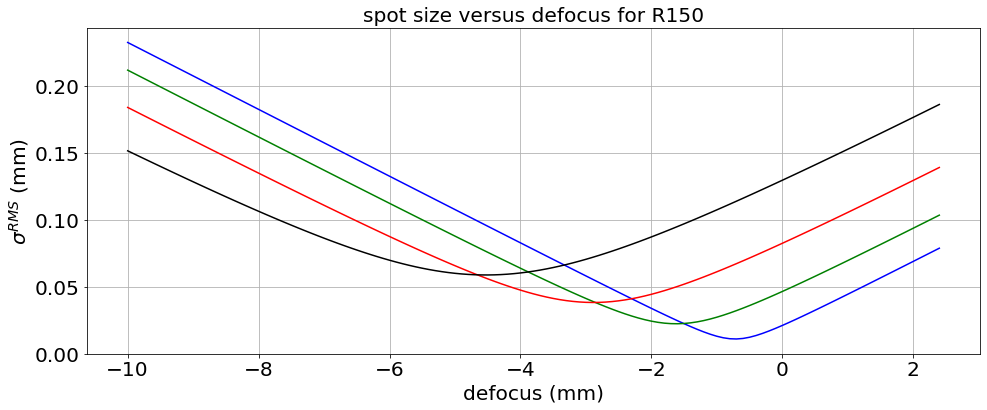

In [187]:
plt.figure(figsize=(16,6))
plt.plot(all_Zfocus,all_XiYi_std_R150[:,0],"b-")
plt.plot(all_Zfocus,all_XiYi_std_R150[:,1],"g-")
plt.plot(all_Zfocus,all_XiYi_std_R150[:,2],"r-")
plt.plot(all_Zfocus,all_XiYi_std_R150[:,3],"k-")
plt.grid()
plt.xlabel("defocus (mm)")
plt.ylabel("$\sigma^{RMS}$ (mm)")
plt.title("spot size versus defocus for R150")

Text(0.5, 1.0, 'spot size versus defocus for HOE and R150')

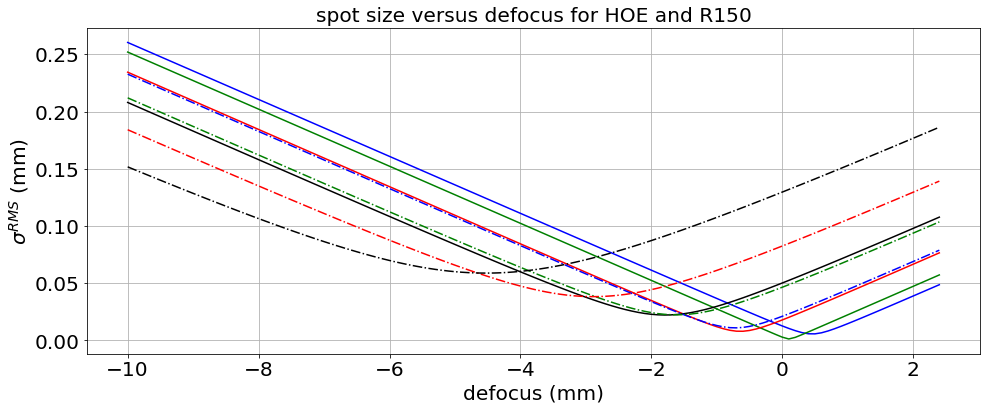

In [188]:
plt.figure(figsize=(16,6))
plt.plot(all_Zfocus,all_XiYi_std_hoe[:,0],"b-")
plt.plot(all_Zfocus,all_XiYi_std_hoe[:,1],"g-")
plt.plot(all_Zfocus,all_XiYi_std_hoe[:,2],"r-")
plt.plot(all_Zfocus,all_XiYi_std_hoe[:,3],"k-")

plt.plot(all_Zfocus,all_XiYi_std_R150[:,0],"b-.")
plt.plot(all_Zfocus,all_XiYi_std_R150[:,1],"g-.")
plt.plot(all_Zfocus,all_XiYi_std_R150[:,2],"r-.")
plt.plot(all_Zfocus,all_XiYi_std_R150[:,3],"k-.")
plt.grid()
plt.xlabel("defocus (mm)")
plt.ylabel("$\sigma^{RMS}$ (mm)")
plt.title("spot size versus defocus for HOE and R150")

# Image for paper

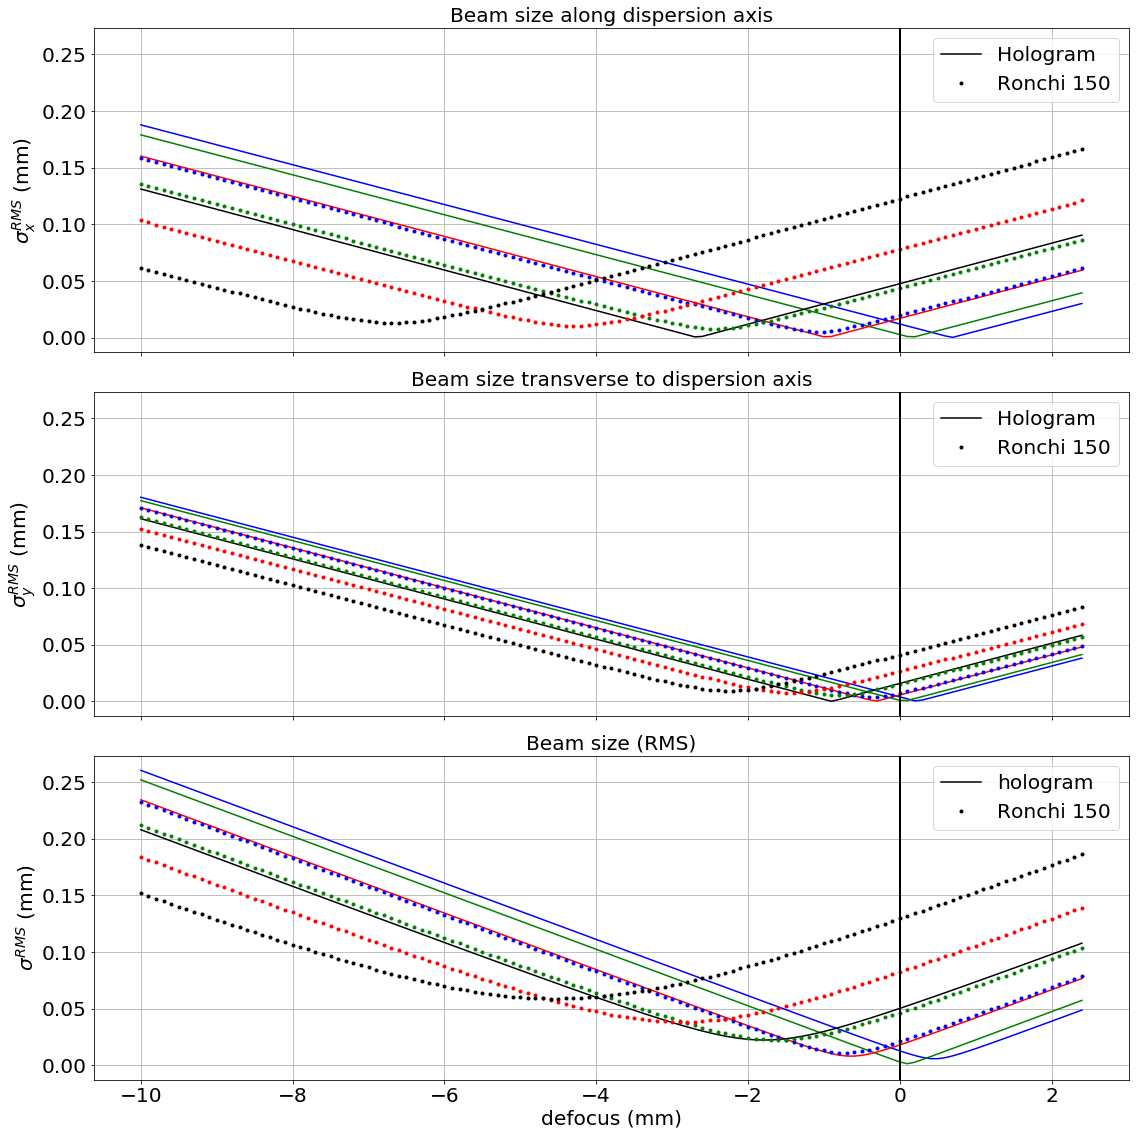

In [189]:
plt.figure(figsize=(16,16))


ax1 = plt.subplot(311)
plt.plot(all_Zfocus,all_Xi_std_hoe[:,0],"b-")
plt.plot(all_Zfocus,all_Xi_std_hoe[:,1],"g-")
plt.plot(all_Zfocus,all_Xi_std_hoe[:,2],"r-")
plt.plot(all_Zfocus,all_Xi_std_hoe[:,3],"k-",label="Hologram")

plt.plot(all_Zfocus,all_Xi_std_R150[:,0],"b.")
plt.plot(all_Zfocus,all_Xi_std_R150[:,1],"g.")
plt.plot(all_Zfocus,all_Xi_std_R150[:,2],"r.")
plt.plot(all_Zfocus,all_Xi_std_R150[:,3],"k.",label="Ronchi 150")

#plt.plot(all_Zfocus,all_Xi_std_R200[:,0],"b.")
#plt.plot(all_Zfocus,all_Xi_std_R200[:,1],"g.")
#plt.plot(all_Zfocus,all_Xi_std_R200[:,2],"r.")
#plt.plot(all_Zfocus,all_Xi_std_R200[:,3],"k.")

plt.axvline(x=0,lw=2,c="k")

plt.grid()
plt.legend()
#plt.xlabel("defocus (mm)")
plt.ylabel("$\sigma_{x}^{RMS}$ (mm)")
plt.title("Beam size along dispersion axis")

plt.setp(ax1.get_xticklabels(), visible=False)
#plt.setp(ax1.get_xticklabels(), fontsize=6)


ax2 = plt.subplot(312, sharex=ax1,sharey=ax1)
plt.plot(all_Zfocus,all_Yi_std_hoe[:,0],"b-")
plt.plot(all_Zfocus,all_Yi_std_hoe[:,1],"g-")
plt.plot(all_Zfocus,all_Yi_std_hoe[:,2],"r-")
plt.plot(all_Zfocus,all_Yi_std_hoe[:,3],"k-",label="Hologram")

plt.plot(all_Zfocus,all_Yi_std_R150[:,0],"b.")
plt.plot(all_Zfocus,all_Yi_std_R150[:,1],"g.")
plt.plot(all_Zfocus,all_Yi_std_R150[:,2],"r.")
plt.plot(all_Zfocus,all_Yi_std_R150[:,3],"k.",label="Ronchi 150")

#plt.plot(all_Zfocus,all_Yi_std_R200[:,0],"b.")
#plt.plot(all_Zfocus,all_Yi_std_R200[:,1],"g.")
#plt.plot(all_Zfocus,all_Yi_std_R200[:,2],"r.")
#plt.plot(all_Zfocus,all_Yi_std_R200[:,3],"k.")

plt.axvline(x=0,lw=2,c="k")

plt.grid()
plt.legend()
#plt.xlabel("defocus (mm)")
plt.ylabel("$\sigma_{y}^{RMS}$ (mm)")
plt.title("Beam size transverse to dispersion axis")

# make these tick labels invisible
plt.setp(ax2.get_xticklabels(), visible=False)

# share x and y
ax3 = plt.subplot(313, sharex=ax1, sharey=ax1)
plt.plot(all_Zfocus,all_XiYi_std_hoe[:,0],"b-")
plt.plot(all_Zfocus,all_XiYi_std_hoe[:,1],"g-")
plt.plot(all_Zfocus,all_XiYi_std_hoe[:,2],"r-")
plt.plot(all_Zfocus,all_XiYi_std_hoe[:,3],"k-",label="hologram")

plt.plot(all_Zfocus,all_XiYi_std_R150[:,0],"b.")
plt.plot(all_Zfocus,all_XiYi_std_R150[:,1],"g.")
plt.plot(all_Zfocus,all_XiYi_std_R150[:,2],"r.")
plt.plot(all_Zfocus,all_XiYi_std_R150[:,3],"k.",label="Ronchi 150")

#plt.plot(all_Zfocus,all_XiYi_std_R200[:,0],"b:")
#plt.plot(all_Zfocus,all_XiYi_std_R200[:,1],"g:")
#plt.plot(all_Zfocus,all_XiYi_std_R200[:,2],"r:")
#plt.plot(all_Zfocus,all_XiYi_std_R200[:,3],"k:")

plt.axvline(x=0,lw=2,c="k")

plt.grid()
plt.legend()
plt.xlabel("defocus (mm)")
plt.ylabel("$\sigma^{RMS}$ (mm)")
plt.title("Beam size (RMS)")

plt.tight_layout()
plt.savefig("defocus.pdf")

plt.show()
